# Retirement Planner

---

## Environment Setup

In [1]:
# Install Anaconda Environment
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-07-31 01:07:36--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   133MB/s    in 0.6s    

2020-07-31 01:07:37 (133 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [2]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
#import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Install and import Alpaca API
!pip3 install alpaca-trade-api
import alpaca_trade_api as tradeapi

     |████████████████████████████████| 204kB 8.0MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 1.2MB 10.3MB/s 
     |████████████████████████████████| 266kB 19.9MB/s 
     |████████████████████████████████| 153kB 21.3MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25705 sha256=f3b67b2fddc9f9ce849a0ee224c40e655e261d43cdc04dbb179403b30873dcc8
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=026be191c9e163b72ffea95842c8d9bafc4ed030bf589a1d57597e1166611b44
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [4]:
# Env install and import to access keys
  #!pip install colab-env -qU
  #from colab_env import envvar_handler
!pip install -q python-dotenv
from dotenv import load_dotenv

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

---

## Portfolio Planner

In this activity, you will use the Alpaca API to grab historical data for a `60/40` portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [7]:
# Load .env enviroment variables
# Set environment variables from the .env file
donenv_path = '/content/drive/My Drive/Colab Notebooks/env_config.txt'
load_dotenv(donenv_path)

True

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#alpaca_base_url = os.getenv("ALPACA_DEMO_URL")
len(alpaca_api_key)

20

In [9]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [12]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = datetime.now()
start_date = end_date + timedelta(-365)

# Get 1 year's worth of historical data for SPY and AGG
df = alpaca_api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.index = df.index.date

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1,
    )

In [13]:
# Display sample data
df.tail(10)

,AGG,SPY
,close,close
2020-07-17,118.86,321.670
2020-07-20,118.98,324.360
2020-07-21,119.05,324.960
2020-07-22,119.18,326.820
2020-07-23,119.36,322.935
2020-07-24,119.29,320.860
2020-07-27,119.18,323.180
2020-07-28,119.27,321.200
2020-07-29,119.42,325.090


---

## Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:

1. Calculate the daily returns for the SPY and AGG closing prices.

2. Calculate volatility for both the SPY and AGG closing prices.

3. Find the last day's closing price for both stocks and save those as variables

4. Run a Monte Carlo Simulation of at least `100` iterations and generate at least `30` years of closing prices

**Hint:** There are `252` trading days per year, so the number of records to generate for each Monte Carlo run will be `252 days * 30 years`.

In [14]:
# Calculate the daily roi for the stocks
daily_roi = df.pct_change().dropna()
spy_avg_daily_roi = daily_roi['SPY']['close'].mean()
agg_avg_daily_roi = daily_roi['AGG']['close'].mean()
# Display sample data
spy_avg_daily_roi, agg_avg_daily_roi

(0.0016042491416597949, 0.0003025832583176332)

In [15]:
# Compute daily volatility
spy_daily_vol = daily_roi['SPY']['close'].std()
agg_daily_vol = daily_roi['AGG']['close'].std()
spy_daily_vol, agg_daily_vol 

(0.029330315954022728, 0.008301474270393351)

In [17]:
# Save the last day's closing price
spy_lastday_close = df['SPY']['close'][-1]
agg_lastday_close = df['AGG']['close'][-1]

In [19]:
# Setup the Monte Carlo Parameters
n_simulations = 500
n_records = 252 * 30
monte_carlo_df = pd.DataFrame()
portfolio_30yr_sim_returns = pd.DataFrame()

In [21]:
# Run the Monte Carlo Simulation
for n in range(n_simulations):
   
    # Initialize the simulated prices list with the last closing price of `SPY` and `AGG`
    sim_spy_prices = [spy_lastday_close]
    sim_agg_prices = [agg_lastday_close]

    # Simulate the returns for 252 days times 30 years
    for r in range(n_records):

        # Calculate the simulated price using the last price within the list
        sim_spy_px = sim_spy_prices[-1] * (1 + np.random.normal(spy_avg_daily_roi, spy_daily_vol ))
        sim_agg_px = sim_agg_prices[-1] * (1 + np.random.normal(agg_avg_daily_roi, agg_daily_vol ))

        # Append the simulated price to the list
        sim_spy_prices.append(sim_spy_px)
        sim_agg_prices.append(sim_agg_px)

    # Append the simulated prices of each simulation to DataFrame
    monte_carlo_df["SPY prices"] = pd.Series(sim_spy_prices)
    monte_carlo_df["AGG prices"] = pd.Series(sim_agg_prices)

    sim_daily_returns = monte_carlo_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Calculate the daily returns of simulated prices
    portfolio_daily_returns = sim_daily_returns.dot(weights)

    portfolio_30yr_sim_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

portfolio_30yr_sim_returns.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983443,0.974354,0.998016,1.020118,1.024163,1.033481,0.986057,1.005767,0.995776,1.009360,1.001160,1.027690,0.996607,1.017535,0.993790,1.006047,1.012027,0.994850,1.038469,1.016985,0.979191,1.024339,1.050853,0.961353,0.984199,0.988292,0.999543,0.998575,1.013179,1.011428,1.002730,1.013060,1.000285,1.016418,1.012489,1.004956,1.011404,1.029448,0.997515,0.991681,...,0.981326,1.004890,0.981533,1.012656,1.018054,1.022948,1.020268,1.013145,1.028156,1.012841,0.994600,0.999296,1.033333,1.009751,1.014161,0.971451,1.016298,0.990101,0.986327,0.988554,0.972522,0.999350,0.992518,1.001701,1.007266,1.031396,1.005485,0.963355,0.966769,1.006976,0.983016,1.025828,0.999118,0.990387,1.010536,0.985145,0.976762,1.010336,0.989026,1.004207
2,0.996821,0.971070,0.993079,1.031297,0.989200,1.011468,0.946240,1.001828,1.025717,0.994666,0.999154,0.986296,0.986273,1.029776,1.013480,1.045039,0.987666,0.963721,1.080868,1.004752,0.984964,1.010219,1.056421,0.939587,0.957159,0.986860,1.034237,1.017062,1.035483,0.999008,1.039257,1.032415,1.010175,1.002040,0.978116,1.004281,1.003651,1.021409,0.980452,0.994447,...,0.989476,0.996282,0.984650,1.021398,1.016098,1.036774,1.024739,1.003495,1.023310,1.005931,0.998417,1.001568,1.043614,1.039260,1.008887,0.975146,1.024673,0.991961,0.966322,0.996901,0.971633,0.984967,1.032560,1.000517,1.014287,1.022370,1.014365,0.990199,0.960379,1.013977,1.008856,1.036594,1.004418,0.994704,0.997391,0.982484,0.977464,1.009022,1.002050,0.992550
3,0.996076,0.982907,0.971017,1.027832,0.999278,1.025151,0.923975,1.000132,1.055937,1.023454,0.989449,0.989451,0.980412,1.020764,0.990776,1.035824,1.003608,0.951188,1.090292,0.999994,0.943404,1.012240,1.050876,0.936428,0.945403,0.990001,1.054957,1.031556,1.020269,1.023900,1.031795,1.016480,0.960016,0.991386,0.996023,1.031739,0.977677,1.020260,0.980243,0.980181,...,0.993382,1.017602,0.995022,1.018415,1.050706,1.051971,1.005620,1.017851,1.027224,1.046081,0.987471,1.013318,1.037085,1.021047,1.020751,0.982817,0.999542,0.983257,0.971684,1.001451,0.986784,1.011466,1.074757,1.011797,1.008881,1.013327,1.026744,0.971433,0.985660,1.013247,1.017796,1.053394,1.009216,0.969461,0.992046,0.995397,0.996684,1.020747,0.997026,0.984539
4,1.005952,0.969243,0.991298,1.032837,0.980138,1.019844,0.913319,1.028431,1.016354,1.056907,0.985614,1.021971,0.958894,0.971608,0.977969,1.020747,1.001823,0.944066,1.074143,1.029676,0.963020,1.057547,1.019474,0.932409,0.941861,1.014597,1.079634,1.053961,1.041309,1.023905,0.986593,1.028920,0.954816,1.008346,1.011857,1.040361,0.999020,1.012536,0.985424,1.007503,...,0.976705,1.032387,1.004096,1.018705,1.058096,1.057167,1.010294,1.043538,1.032284,1.038441,0.967196,1.021053,1.028621,1.037929,1.035366,0.997759,1.002378,0.986463,0.961380,1.019142,0.999970,1.016293,1.060275,0.988504,1.003465,0.995535,1.029861,0.978441,1.002740,1.019291,1.010403,1.047024,1.027232,0.990882,0.980153,0.973747,0.998542,1.036790,1.009075,0.993296


In [26]:
# Check that the simulation ran successfully
portfolio_30yr_sim_returns.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 500 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       float64
 1   1       float64
 2   2       float64
 3   3       float64
 4   4       float64
 5   5       float64
 6   6       float64
 7   7       float64
 8   8       float64
 9   9       float64
 10  10      float64
 11  11      float64
 12  12      float64
 13  13      float64
 14  14      float64
 15  15      float64
 16  16      float64
 17  17      float64
 18  18      float64
 19  19      float64
 20  20      float64
 21  21      float64
 22  22      float64
 23  23      float64
 24  24      float64
 25  25      float64
 26  26      float64
 27  27      float64
 28  28      float64
 29  29      float64
 30  30      float64
 31  31      float64
 32  32      float64
 33  33      float64
 34  34      float64
 35  35      float64
 36  36      float64
 37  37      float64
 38  38      float64
 39  39      float64
 40  40   

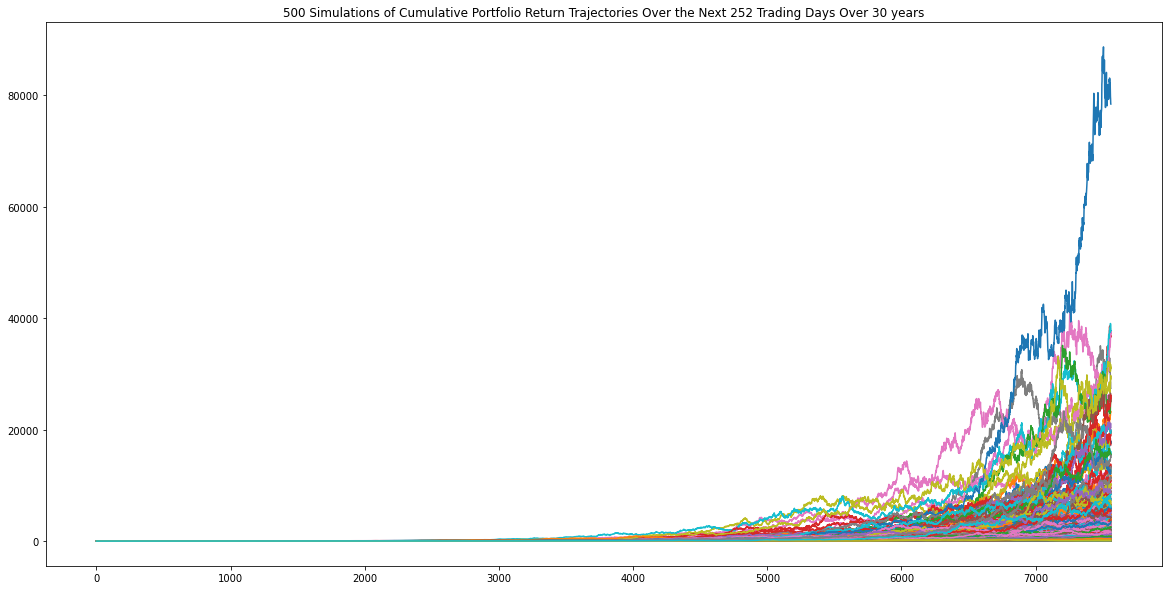

In [27]:
# Visualize the Simulation
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days Over 30 years"
portfolio_30yr_sim_returns.plot(legend=None, figsize = (20,10), title=plot_title)

In [40]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
portfolio_sim_end_year20 = portfolio_30yr_sim_returns.iloc[0:(252*20),-1]
portfolio_sim_end_year20

0         1.000000
1         1.004207
2         0.992550
3         0.984539
4         0.993296
           ...    
5035    250.638493
5036    254.790316
5037    258.710810
5038    260.273181
5039    259.965003
Name: 499, Length: 5040, dtype: float64

In [41]:
# Display the 90% confidence interval for the ending returns
portfolio_sim_end_year20.value_counts(bins=10) / len(portfolio_sim_end_year20)
confidence_interval = portfolio_sim_end_year20.quantile(q=[0.05, 0.95])
confidence_interval

0.05      1.148030
0.95    105.905842
Name: 499, dtype: float64

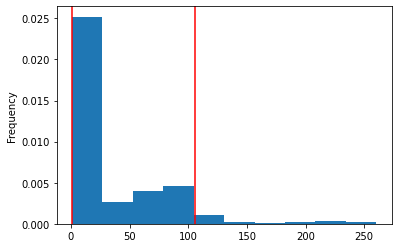

In [42]:
# Visualize the distribution of the ending returns
plt.figure();
portfolio_sim_end_year20.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

## Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at `30` years for the `10th`, `50th`, and `90th` percentiles?

2. Given an initial investment of `$20,000`, what is the expected return in dollars at the `10th`, `50th`, and `90th` percentiles?

3. Given the current projected annual income from the Plaid analysis, will a `4%` withdrawal rate meet or exceed that value at the `10th` percentile? Note: This is basically determining if retirement income is equivalent to current income.

4. How would a `50%` increase in the initial investment amount affect the `4%` retirement withdrawal? In other words, what happens if the initial investment had been bigger?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [43]:
# Compute cumulative returns
three_confidence_intervals = portfolio_sim_end_year20.quantile(q=[0.1,0.5,0.9])
three_confidence_intervals

0.1     1.930641
0.5    18.307624
0.9    96.901710
Name: 499, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [48]:
# Set initial investment
initial_investment = 20000

# Compute expected portfolio return

expected_return_lower_bound = initial_investment + (initial_investment * three_confidence_intervals.iloc[0])
expected_return_mid_bound = initial_investment + (initial_investment * three_confidence_intervals.iloc[1])
expected_return_upper_bound = initial_investment + (initial_investment * three_confidence_intervals.iloc[2])

print(f'The expected portfolio balance for the 10th percentile with an initial investment of $20,000.00 would be ${round(expected_return_lower_bound,2)}')
print(f'The expected portfolio balance for the 50th percentile with an initial investment of $20,000.00 would be ${round(expected_return_mid_bound,2)}')
print(f'The expected portfolio balance for the 10th percentile with an initial investment of $20,000.00 would be ${round(expected_return_upper_bound,2)}')

The expected portfolio balance for the 10th percentile with an initial investment of $20,000.00 would be $58612.82
The expected portfolio balance for the 50th percentile with an initial investment of $20,000.00 would be $386152.48
The expected portfolio balance for the 10th percentile with an initial investment of $20,000.00 would be $1958034.21


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [57]:
# Set Plaid's projected income

plaid_projected_annual_income = 6085

# Calculate the 4% withdrawal for the ending return as retirement income

def retirement_calc(withdraw_rate, initial_investment, portfolio_sim_end_year20, plaid_projected_annual_income):
    retirement_income = withdraw_rate * (initial_investment * portfolio_sim_end_year20.quantile(.1))
    if retirement_income > plaid_projected_annual_income:
        answer = "exceeds"
    else:
        answer = "not meet"
    return (f"Your retirement income at the 10th percentile, while factoring a \
{withdraw_rate*100}% withdraw rate, is ${int(retirement_income)} \
and will {answer} your current income ${plaid_projected_annual_income}.")

# Determine if the retirement income meets or exceeds the current projected income
withdraw_rate = 0.04
initial_investment = 20000
plaid_projected_annual_income = 7389
print(retirement_calc(withdraw_rate,initial_investment, portfolio_sim_end_year20, plaid_projected_annual_income))

Your retirement income at the 10th percentile, while factoring a 4.0% withdraw rate, is $1544 and will not meet your current income $7389.


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [58]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
initial_investment *= 1.5
print(retirement_calc(withdraw_rate, initial_investment, portfolio_sim_end_year20, plaid_projected_annual_income))

Your retirement income at the 10th percentile, while factoring a 4.0% withdraw rate, is $2316 and will not meet your current income $7389.


### Optional Challenge

Use the Monte Carlo data and calculate the cumulative returns at the `5%`, `50%`, and `95%` quartiles and plot this data as a line chart to see how the cumulative returns change over the life of the investment.

In this section, you need to calculate and plot the cumulative returns for the median and `90%` confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# Compute projected returns

# Display sample data


In [ ]:
# Plot the cumulative returns over time


In [ ]:
# Compute portfolio performance over time

# Plot projected performance over time
